In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skrf as rf
from skrf.media import *
from skrf import Frequency
import json

(4.0, 9.0)

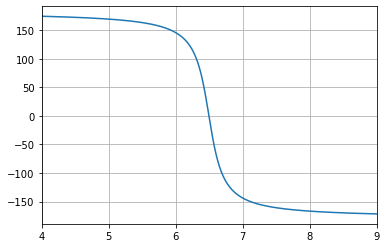

In [10]:
fghz  = np.linspace(4,9,1601)
f = fghz*1e9
sopen = fghz*0j + 1
open_network = rf.Network(frequency=f, s=sopen, z0=50)
C_shunt = 10e-12 # farads
L_shunt = 60e-12 # henries
omega = 2*np.pi*f
Y_c_shunt = 1j*omega*C_shunt
Y_l_shunt = 1/(1j*omega*L_shunt)
c_in = 1.5e-12
Z_c_in = 1/(1j*2*np.pi*f)
c_shunt_network = rf.Circuit.ShuntAdmittance(f, Y_c_shunt, name='shunt_admittance')
l_shunt_network = rf.Circuit.ShuntAdmittance(f, Y_l_shunt, name='shunt_admittance2')
cin_series_network = rf.Circuit.SeriesImpedance(f,Z_c_in,name='cin')
jpa = cin_series_network**l_shunt_network**c_shunt_network**open_network
plt.plot(fghz,jpa.s_deg_unwrap[:,0,0])
plt.grid()
plt.xlim(4,9)

In [11]:
f_coax = Frequency(fghz[0], fghz[len(fghz)-1], len(fghz), 'GHz')
coax = coaxial.Coaxial(f_coax,Dint=0.0005,Dout=0.001675,epsilon_r=2.1,sigma=1.2e7,z0_port=50)


(4.0, 9.0)

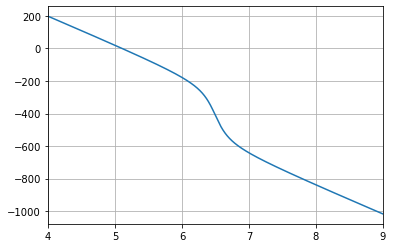

In [18]:
coax_length = coax.line(5, unit = 'cm')
coax_jpa = coax_length**cin_series_network**l_shunt_network**c_shunt_network**open_network
plt.plot(fghz,coax_jpa.s_deg_unwrap[:,0,0] + 360)
plt.grid()
plt.xlim(4,9)

In [19]:
file_object = open("control.json", "r")
control = json.loads(file_object.read())
file_object.close()

In [20]:
control

{'coax_length': 0.08,
 'LJmin': 1e-11,
 'L0': 1e-11,
 'C0': 9.2e-12,
 'Cin': 1.5e-12,
 'phi': 0.25}

1e-11

In [ ]:
fghz  = np.linspace(4,9,1601)
f = fghz*1e9
sopen = fghz*0j + 1
open_network = rf.Network(frequency=f, s=sopen, z0=50)
C_shunt = 10e-12 # farads
L_shunt = 60e-12 # henries
omega = 2*np.pi*f
Y_c_shunt = 1j*omega*C_shunt
Y_l_shunt = 1/(1j*omega*L_shunt)
c_in = 1.5e-12
Z_c_in = 1/(1j*2*np.pi*f)
c_shunt_network = rf.Circuit.ShuntAdmittance(f, Y_c_shunt, name='shunt_admittance')
l_shunt_network = rf.Circuit.ShuntAdmittance(f, Y_l_shunt, name='shunt_admittance2')
cin_series_network = rf.Circuit.SeriesImpedance(f,Z_c_in,name='cin')
jpa = cin_series_network**l_shunt_network**c_shunt_network**open_network
